In [268]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score
from PrepareDataset import PrepareDataset

import matplotlib.pyplot as plt

In [269]:
data = pd.read_csv('dataset.csv', header=0)

In [270]:
dataset = PrepareDataset(data)
dataset = dataset.early_preparation()
dataset = dataset.set_rows_to_zeros()
dataset = dataset.split_power()
dataset = dataset.standard_scaled_dataset()

In [271]:
train_dataset = dataset.train()
val_dataset = dataset.val()
test_dataset = dataset.test()

In [272]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=7, activation='relu'))
model.add(MaxPooling1D(pool_size=3))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))

In [273]:
model.compile(optimizer=Adam(0.000075), loss='mse')

In [274]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [275]:
model.fit(train_dataset[0], train_dataset[1], epochs=10000, validation_data=(val_dataset[0], val_dataset[1]), callbacks=[early_stopping], batch_size=8)

Epoch 1/10000
819/819 [==============================] - 1s 929us/step - loss: 1309686926147584.0000 - val_loss: 2402608195043328.0000
Epoch 2/10000
819/819 [==============================] - 1s 797us/step - loss: 1309677530906624.0000 - val_loss: 2402570882514944.0000
Epoch 3/10000
819/819 [==============================] - 1s 801us/step - loss: 1309628944089088.0000 - val_loss: 2402448744382464.0000
Epoch 4/10000
819/819 [==============================] - 1s 817us/step - loss: 1309510429835264.0000 - val_loss: 2402190241038336.0000
Epoch 5/10000
819/819 [==============================] - 1s 783us/step - loss: 1309293533986816.0000 - val_loss: 2401755107164160.0000
Epoch 6/10000
819/819 [==============================] - 1s 806us/step - loss: 1308947252248576.0000 - val_loss: 2401087776620544.0000
Epoch 7/10000
819/819 [==============================] - 1s 795us/step - loss: 1308445814816768.0000 - val_loss: 2400162748039168.0000
Epoch 8/10000
819/819 [==============================] 

In [276]:
predictions = model.predict(test_dataset[0])[:,0]

30/30 [==============================] - 0s 653us/step


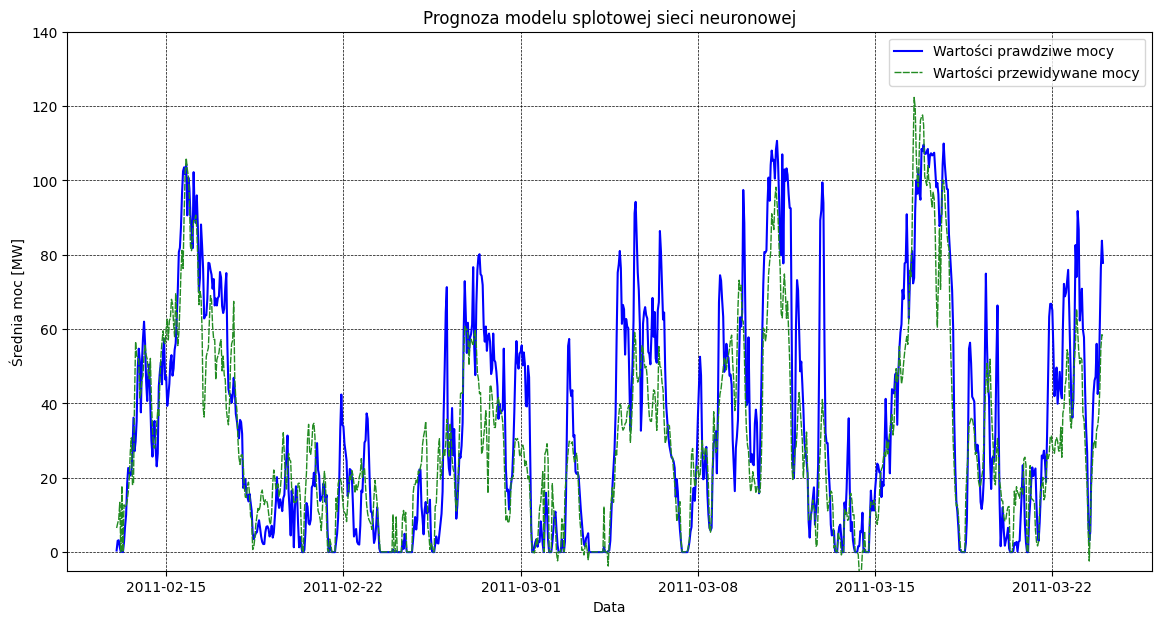

In [278]:
plt.plot(dataset.date_time[int(dataset.lenght * 0.9):], test_dataset[1]/(10**6), color='blue', label='Wartości prawdziwe mocy', linewidth=1.5)
plt.plot(dataset.date_time[int(dataset.lenght * 0.9):], predictions/(10**6), color='forestgreen', linestyle=(0, (5, 1)), label='Wartości przewidywane mocy', linewidth=1)
fig = plt.gcf()
fig = fig.set_size_inches(14,7)
plt.ylim([-5, 140])
plt.ticklabel_format(axis='y', style='plain')
plt.grid(color='k', linewidth=0.5, linestyle='--')
plt.title('Prognoza modelu splotowej sieci neuronowej')
plt.xlabel('Data')
plt.ylabel('Średnia moc [MW]')
plt.legend(loc='best')
plt.show()

In [279]:
print(f'R^2 score: {round(r2_score(test_dataset[1], predictions), 3)}')
print(f'R score: {round(np.sqrt(r2_score(test_dataset[1], predictions)), 3)}')

R^2 score: 0.756
R score: 0.869
